In [545]:
import numpy as np

from encephalon import *
from axon import *
from pons import *
from dendron import *

In [546]:
data = np.array([[[1,1]], [[0,1]], [[1,0]], [[0,0]]])
labels = np.array([[0], [1], [1], [0]])

In [547]:
# F = sigmoid
# G = sigmoid
F = ReLU
G = Id

In [548]:
ser , port = test_serial()
run_sim(ANN([2,3,1],f=F,g=G,noise_amplitude=1/1000),port)

In [549]:
xor = NN([2,2,1],ser, name="xor", f=F, g=G)

In [550]:
# xor.load("/home/eleve/xor_2024-07-20T16:30:54.npz")

In [551]:
# xor.save("xor_tanh_sigmoid")

In [552]:
xor.train(data, labels, 10000,learning_rate=0.1,err_min_init=1e-30,saving=True)

Epoch 10/10000   Error=0.351070
Epoch 20/10000   Error=0.277434
Epoch 30/10000   Error=0.238234
Epoch 40/10000   Error=0.218630
Epoch 50/10000   Error=0.199742
Epoch 60/10000   Error=0.178383
Epoch 70/10000   Error=0.156972
Epoch 80/10000   Error=0.133847
Epoch 90/10000   Error=0.113727
Epoch 100/10000   Error=0.096431
Epoch 110/10000   Error=0.081558
Epoch 120/10000   Error=0.067281
Epoch 130/10000   Error=0.056315
Epoch 140/10000   Error=0.046252
Epoch 150/10000   Error=0.037019
Epoch 160/10000   Error=0.029003
Epoch 170/10000   Error=0.022301
Epoch 180/10000   Error=0.016914
Epoch 190/10000   Error=0.012300
Epoch 200/10000   Error=0.009366
Epoch 210/10000   Error=0.006452
Epoch 220/10000   Error=0.004480
Epoch 230/10000   Error=0.003230
Epoch 240/10000   Error=0.002438
Epoch 250/10000   Error=0.001721
Epoch 260/10000   Error=0.001140
Epoch 270/10000   Error=0.000817
Epoch 280/10000   Error=0.000605
Epoch 290/10000   Error=0.000388
Epoch 300/10000   Error=0.000265
Epoch 310/10000   E

In [553]:
for _ in range(6):
    print(serial_read(ser,0.5))

In [554]:
print(xor.use([[1,1]]))
print(xor.use([[0,1]]))
print(xor.use([[1,0]]))
print(xor.use([[0,0]]))

[[7.180670988371496e-16]]
[[0.9999999999999994]]
[[0.9999999999999982]]
[[1.6134012528756791e-15]]


In [555]:
print(xor.W)
print(xor.b)

{1: array([[1.06270567, 1.11561721],
       [1.30575715, 1.24319365]]), 2: array([[ 0.94099432],
       [-1.7927296 ]])}
{1: array([[ 7.66022059e-18, -1.11561721e+00]]), 2: array([[-0.00081816]])}


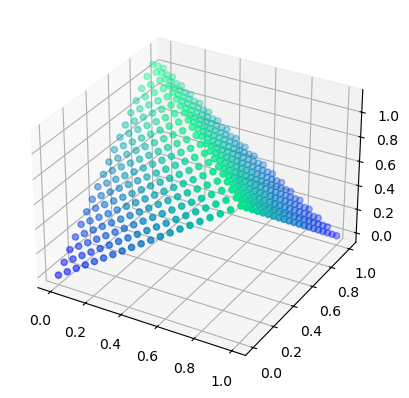

In [556]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = xor.use([x,y])
        points.append([x, y, z[0][0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()